In [1]:
# install required system dependencies
!apt-get install -y xvfb x11-utils  
!apt-get install x11-utils > /dev/null 2>&1
!pip install PyOpenGL==3.1.* \
            PyOpenGL-accelerate==3.1.* \
            gym[box2d]==0.17.* 
!pip install pyglet
!pip install ffmpeg
! pip install pyvirtualdisplay
!pip install Image
!pip install gym-maze-trustycoder83

Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.8).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


If the directory vid exists and has videos left over from previous tries, its better to clean it up before continuing.


In [2]:
!mkdir ./vid
!rm ./vid/*.*

mkdir: cannot create directory ‘./vid’: File exists


In [3]:
import sys
# import pygame
import numpy as np
# import math
# import base64
# import io
# import IPython
import gym
import gym_maze

# from gym.wrappers import Monitor
# from IPython import display
from pyvirtualdisplay import Display
from gym.wrappers.monitoring import video_recorder

import matplotlib.pyplot as plt
%matplotlib inline

d = Display()
d.start()

# Recording filename
video_name = "./vid/Practical_2.mp4"

# Setup the environment for the maze
env = gym.make("maze-sample-10x10-v0")

# Setup the video
vid = None
vid = video_recorder.VideoRecorder(env,video_name)

# env = gym.wrappers.Monitor(env,'./vid',force=True)
#current_state = env.reset()


pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
import random

def q_learning(discount_factor, epsilon):

  current_state = env.reset()

  states_dic = {} #dictionary to keep the states/coordinates of the Q table
  count = 0
  for i in range(10):
    for j in range(10):
      states_dic[i, j] = count
      count+=1
  
  n_actions = env.action_space.n
  
  # Initialize the Q-table to 0
  q_table = np.zeros((len(states_dic),n_actions))

  # Number of episode we will run
  n_episodes = 100

  # Maximum of iteration per episode
  max_iter_episode = 250

  # Initialize the exploration probability to 1
  exploration_proba = epsilon

  # discount factor
  gamma = discount_factor


  # Learning rate
  lr = 1/n_actions

  total_epochs, total_rewards = 0, 0

  rewards_per_episode = []


  # Iterate over episodes
  for e in range(n_episodes):
      
    # We are not done yet
    done = False
    
    # Sum the rewards that the agent gets from the environment
    total_episode_epochs, total_episode_rewards = 0, 0
    
    for i in range(max_iter_episode):
      
      env.unwrapped.render()
      vid.capture_frame()

      current_coordinate_x = int(current_state[0])
      current_coordinate_y = int(current_state[1])
      current_Q_table_coordinates = states_dic[current_coordinate_x, current_coordinate_y]

      if random.uniform(0, 1) < exploration_proba:
        action = env.action_space.sample() # Explore action space
      else:
        action = int(np.argmax(q_table[current_Q_table_coordinates])) # Exploit learned values

        
      next_state, reward, done, info = env.step(action) 

      next_coordinate_x = int(next_state[0]) #get coordinates to be used in dictionary
      next_coordinate_y = int(next_state[1]) #get coordinates to be used in dictionary

      
      # Update our Q-table using the Q-learning iteration
      next_Q_table_coordinates = states_dic[next_coordinate_x, next_coordinate_y]

      # new_value = (1 - learning_rate) * current_value + learning_rate * (reward + gamma * next_max)
      q_table[current_Q_table_coordinates, action] = (1-lr) * q_table[current_Q_table_coordinates, action] +lr*(reward + gamma * max(q_table[next_Q_table_coordinates,:]))

  
      total_episode_rewards = total_episode_rewards + reward
      total_episode_epochs = total_episode_epochs + 1
        
      if done:
        break
      
      current_state = next_state
    
    #Reset enviroment for next episode
    current_state = env.reset()
        
      

    total_epochs = total_epochs + total_episode_epochs
    total_rewards = total_rewards + total_episode_rewards


    #Show the total episode reward        
    #print("Total episode reward:", total_episode_rewards)
    
    rewards_per_episode.append(total_episode_rewards)

    
    cumulative_reward = np.cumsum(np.array(rewards_per_episode))    
    for i in range(cumulative_reward.shape[0]):       
        if i == 0:
            continue        
        #print(cumulative_reward[i] / (i + 1))
        cumulative_reward[i] =  cumulative_reward[i] / (i + 1)
    
  print(f"Results after {n_episodes} episodes:")
  print(f"Average timesteps per episode: {total_epochs / n_episodes}")
  print(f"Average rewards per episode: {total_rewards / n_episodes}")

  return cumulative_reward

In [5]:
cumulative_reward_1 = q_learning(discount_factor = 0.5, epsilon = 0.0)
print()

cumulative_reward_2 = q_learning(discount_factor = 0.5, epsilon = 0.3)
print()

cumulative_reward_3 = q_learning(discount_factor = 0.5, epsilon = 0.9)
print()


Results after 100 episodes:
Average timesteps per episode: 80.52
Average rewards per episode: 0.8504099999999998

Results after 100 episodes:
Average timesteps per episode: 91.38
Average rewards per episode: 0.8095200000000001

Results after 100 episodes:
Average timesteps per episode: 223.76
Average rewards per episode: 0.09655999999999992



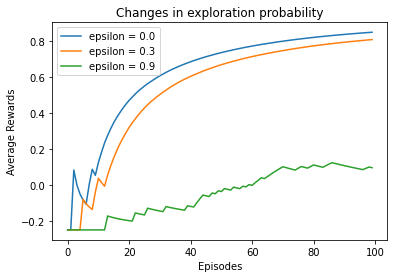

In [6]:
plt.plot(cumulative_reward_1, label = "epsilon = 0.0")
plt.plot(cumulative_reward_2, label = "epsilon = 0.3")
plt.plot(cumulative_reward_3, label = "epsilon = 0.9")
plt.xlabel('Episodes')
plt.ylabel('Average Rewards')
plt.title('Changes in exploration probability')
plt.legend()
plt.show()

In [7]:
cumulative_reward_3 = q_learning(discount_factor = 0.1, epsilon = 0.1)
print()

cumulative_reward_4 = q_learning(discount_factor = 0.3, epsilon = 0.1)
print()

cumulative_reward_5 = q_learning(discount_factor = 0.9, epsilon = 0.1)
print()


Results after 100 episodes:
Average timesteps per episode: 235.17
Average rewards per episode: -0.014950000000000083

Results after 100 episodes:
Average timesteps per episode: 97.25
Average rewards per episode: 0.78363

Results after 100 episodes:
Average timesteps per episode: 70.79
Average rewards per episode: 0.8701499999999995



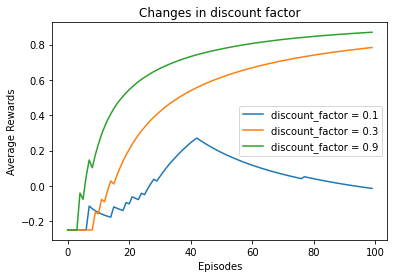

In [9]:
plt.plot(cumulative_reward_3, label = "discount_factor = 0.1")
plt.plot(cumulative_reward_4, label = "discount_factor = 0.3")
plt.plot(cumulative_reward_5, label = "discount_factor = 0.9")
plt.xlabel('Episodes')
plt.ylabel('Average Rewards')
plt.title('Changes in discount factor')
plt.legend()
plt.show()

**Realistic Initialisation with discount factor = 0.7 and exploration_probability = 0.1**

In [11]:
current_state = env.reset()

states_dic = {} #dictionary to keep the states/coordinates of the Q table
count = 0
for i in range(10):
  for j in range(10):
    states_dic[i, j] = count
    count+=1

n_actions = env.action_space.n

# Initialize the Q-table to 0
q_table = np.zeros((len(states_dic),n_actions))

# Number of episode we will run
n_episodes = 100

# Maximum of iteration per episode
max_iter_episode = 250

# Initialize the exploration probability to 1
exploration_proba = 0.1

# discount factor
gamma = 0.7


# Learning rate
lr = 1/n_actions

total_epochs, total_rewards = 0, 0

rewards_per_episode_real = []


# Iterate over episodes
for e in range(n_episodes):
    
  # We are not done yet
  done = False
  
  # Sum the rewards that the agent gets from the environment
  total_episode_epochs, total_episode_rewards = 0, 0
  
  for i in range(max_iter_episode):
    
    env.unwrapped.render()
    vid.capture_frame()

    current_coordinate_x = int(current_state[0])
    current_coordinate_y = int(current_state[1])
    current_Q_table_coordinates = states_dic[current_coordinate_x, current_coordinate_y]

    if random.uniform(0, 1) < exploration_proba:
      action = env.action_space.sample() # Explore action space
    else:
      action = int(np.argmax(q_table[current_Q_table_coordinates])) # Exploit learned values

      
    next_state, reward, done, info = env.step(action) 

    next_coordinate_x = int(next_state[0]) #get coordinates to be used in dictionary
    next_coordinate_y = int(next_state[1]) #get coordinates to be used in dictionary

    
    # Update our Q-table using the Q-learning iteration
    next_Q_table_coordinates = states_dic[next_coordinate_x, next_coordinate_y]

    # new_value = (1 - learning_rate) * current_value + learning_rate * (reward + gamma * next_max)
    q_table[current_Q_table_coordinates, action] = (1-lr) * q_table[current_Q_table_coordinates, action] +lr*(reward + gamma * max(q_table[next_Q_table_coordinates,:]))


    total_episode_rewards = total_episode_rewards + reward
    total_episode_epochs = total_episode_epochs + 1
      
    if done:
      break
    
    current_state = next_state
  
  #Reset enviroment for next episode
  current_state = env.reset()
      
  total_epochs = total_epochs + total_episode_epochs
  total_rewards = total_rewards + total_episode_rewards

  #Show the total episode reward        
  #print("Total episode reward:", total_episode_rewards)
  
  rewards_per_episode_real.append(total_episode_rewards)

  
  cumulative_reward_real = np.cumsum(np.array(rewards_per_episode_real))    
  for i in range(cumulative_reward_real.shape[0]):       
      if i == 0:
          continue        
      #print(cumulative_reward_real[i] / (i + 1))
      cumulative_reward_real[i] =  cumulative_reward_real[i] / (i + 1)
  
print(f"Results after {n_episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / n_episodes}")
print(f"Average rewards per episode: {total_rewards / n_episodes}")

Results after 100 episodes:
Average timesteps per episode: 77.65
Average rewards per episode: 0.8432699999999997


**Initialising the optimal initial value**

In [12]:
mean_each_actions = q_table.mean(axis=0)
print("Mean value for each action: {}".format(mean_each_actions), '\n')

# initialise the q-value for each action above the mean
initialised_values = mean_each_actions + 0.05
print("Initialised values for each action: {}".format(initialised_values))

Mean value for each action: [0.00649401 0.01274665 0.00575839 0.02888208] 

Initialised values for each action: [0.05649401 0.06274665 0.05575839 0.07888208]


In [13]:
q_table_op = q_table = np.zeros((len(states_dic),n_actions))

q_table_op = q_table_op + initialised_values

#print(q_table_op)


In [15]:
# Number of episode we will run
n_episodes = 100

# Maximum of iteration per episode
max_iter_episode = 250

# Initialize the exploration probability to 1
exploration_proba = 0.1

# discount factor
gamma = 0.7


# Learning rate
lr = 1/n_actions

total_epochs, total_rewards = 0, 0

rewards_per_episode_op = []


# Iterate over episodes
for e in range(n_episodes):
    
  # We are not done yet
  done = False
  
  # Sum the rewards that the agent gets from the environment
  total_episode_epochs, total_episode_rewards = 0, 0
  
  for i in range(max_iter_episode):
    
    env.unwrapped.render()
    vid.capture_frame()

    current_coordinate_x = int(current_state[0])
    current_coordinate_y = int(current_state[1])
    current_Q_table_coordinates = states_dic[current_coordinate_x, current_coordinate_y]

    if random.uniform(0, 1) < exploration_proba:
      action = env.action_space.sample() # Explore action space
    else:
      action = int(np.argmax(q_table_op[current_Q_table_coordinates])) # Exploit learned values

      
    next_state, reward, done, info = env.step(action) 

    next_coordinate_x = int(next_state[0]) #get coordinates to be used in dictionary
    next_coordinate_y = int(next_state[1]) #get coordinates to be used in dictionary

    
    # Update our Q-table using the Q-learning iteration
    next_Q_table_coordinates = states_dic[next_coordinate_x, next_coordinate_y]

    # new_value = (1 - learning_rate) * current_value + learning_rate * (reward + gamma * next_max)
    q_table_op[current_Q_table_coordinates, action] = (1-lr) * q_table_op[current_Q_table_coordinates, action] +lr*(reward + gamma * max(q_table_op[next_Q_table_coordinates,:]))


    total_episode_rewards = total_episode_rewards + reward
    total_episode_epochs = total_episode_epochs + 1
      
    if done:
      break
    
    current_state = next_state
  
  #Reset enviroment for next episode
  current_state = env.reset()
      
  total_epochs = total_epochs + total_episode_epochs
  total_rewards = total_rewards + total_episode_rewards

  #Show the total episode reward        
  #print("Total episode reward:", total_episode_rewards)
  
  rewards_per_episode_op.append(total_episode_rewards)

  cumulative_reward_op = np.cumsum(np.array(rewards_per_episode_op))    
  for i in range(cumulative_reward_op.shape[0]):       
      if i == 0:
          continue        
      #print(cumulative_reward_op[i] / (i + 1))
      cumulative_reward_op[i] =  cumulative_reward_op[i] / (i + 1)
  
print(f"Results after {n_episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / n_episodes}")
print(f"Average rewards per episode: {total_rewards / n_episodes}")

Results after 100 episodes:
Average timesteps per episode: 74.14
Average rewards per episode: 0.9168499999999998


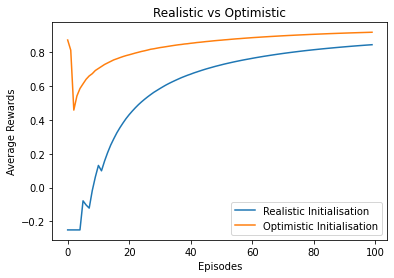

In [16]:
plt.plot(cumulative_reward_real, label = "Realistic Initialisation")
plt.plot(cumulative_reward_op, label = "Optimistic Initialisation")
plt.xlabel('Episodes')
plt.ylabel('Average Rewards')
plt.title('Realistic vs Optimistic')
plt.legend()
plt.show()